In [ ]:
import pandas as pd

# Sample data
data = {
    'sensor_reading': [5850, 6800, 6653, 7005.85, 7713, 8600, 7786, 7511, 6700, 7552],
    'actual_glucose': [90, 86, 92, 111, 96, 124, 99, 138, 87, 95]
}

df = pd.DataFrame(data)


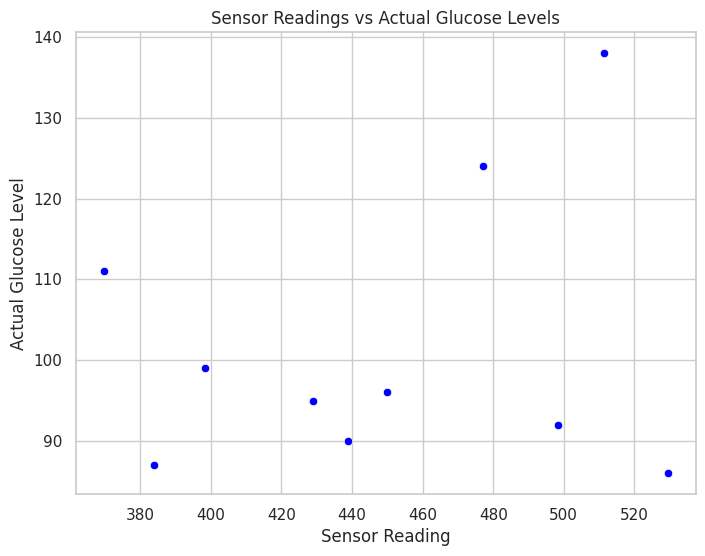

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sensor_reading', y='actual_glucose', data=df, color='blue')
plt.title("Sensor Readings vs Actual Glucose Levels")
plt.xlabel("Sensor Reading")
plt.ylabel("Actual Glucose Level")
plt.show()


# **Our Sensors data calculations**


Polynomial regression

Polynomial Coefficients: [ 2.61100004e-04 -3.89980957e-01  2.35525085e+02]
Root Mean Squared Error (RMSE): 13.89525784488399
Mean Absolute Error (MAE): 10.2070578487632


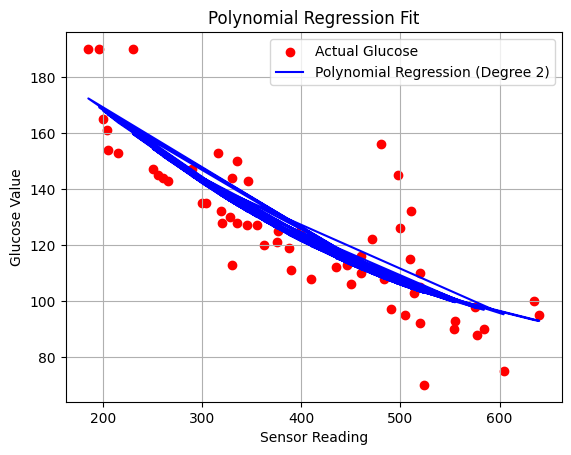

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Adjusted sensor readings
data = {
    'sensor_reading': [520, 635, 640, 514, 584, 388, 554, 482, 555, 435, 524, 483, 446, 362, 577],
    'actual_glucose': [105, 100, 95, 103, 90, 119, 90, 110, 93, 112, 70, 108, 113, 120, 88]
}
data1 = {
    'sensor_reading': [328, 255,471,500,511,304,260,316,376,196,497,200,204,346,319],
    'actual_glucose': [130, 145,122,126,132,135,144,153,125,190,145,165,161,143,132]
}
data2 = {
    'sensor_reading': [345, 399,460,510,520,410,575,330,390,450,505,290,604,460,335],
    'actual_glucose': [127, 125, 116, 115,110,108,98,113,111,106,95,147,75,110,128]
}
data3 = {
    'sensor_reading': [335, 230,300,320,330,480,265,520,375,185,490,205,215,355,250,328, 255,471,500,511,304,260,316,376,196,497,200,204,346,319,345,399,460,510,520,410,575,330,390,450,505,290,604,460,335,520, 635, 640, 514, 584, 388, 554, 482, 555, 435, 524, 483, 446, 362, 577],
    'actual_glucose': [150,190,135,128,144,156,143,92,121,190,97,154,153,127,147,130, 145,122,126,132,135,144,153,125,190,145,165,161,143,132,127, 125, 116, 115,110,108,98,113,111,106,95,147,75,110,128,105, 100, 95, 103, 90, 119, 90, 110, 93, 112, 70, 108, 113, 120, 88]
}
# Create a DataFrame
df = pd.DataFrame(data3)

# Degree of polynomial (e.g., 2 for quadratic)
degree = 2

# Fit a polynomial regression model
coefficients = np.polyfit(df['sensor_reading'], df['actual_glucose'], degree)

# Display the coefficients
print("Polynomial Coefficients:", coefficients)

# Generate polynomial function from coefficients
poly_func = np.poly1d(coefficients)

# Predict glucose values using the polynomial model
predicted_glucose = poly_func(df['sensor_reading'])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(df['actual_glucose'], predicted_glucose))
mae = mean_absolute_error(df['actual_glucose'], predicted_glucose)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted glucose values
plt.scatter(df['sensor_reading'], df['actual_glucose'], color='red', label='Actual Glucose')
plt.plot(df['sensor_reading'], predicted_glucose, color='blue', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel("Sensor Reading")
plt.ylabel("Glucose Value")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
coefficients = [3.04178094e-04, -2.08655142e-01,  1.33363443e+02]

# Display the coefficients
print("Polynomial Coefficients:", coefficients)

# Generate polynomial function from coefficients
poly_func = np.poly1d(coefficients)

# Predict glucose values using the polynomial model
predicted_glucose = poly_func(df['sensor_reading'])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(df['actual_glucose'], predicted_glucose))
mae = mean_absolute_error(df['actual_glucose'], predicted_glucose)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Polynomial Coefficients: [0.000304178094, -0.208655142, 133.363443]
Root Mean Squared Error (RMSE): 16.004595417760825
Mean Absolute Error (MAE): 13.287442257084319


Should improve Rmse and mae, logistic and other regressions do a comparision
**`# for results`**

Logistic regression

<ipython-input-39-0ea3ba891d89>:21: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(logistic_model, df['sensor_reading'], df['actual_glucose'], maxfev=10000)


Optimized parameters: L = 124.58333331206433 , k = 1.0 , x0 = 1.0
RMSE: 26.412302478622006
MAE: 21.08333333333333


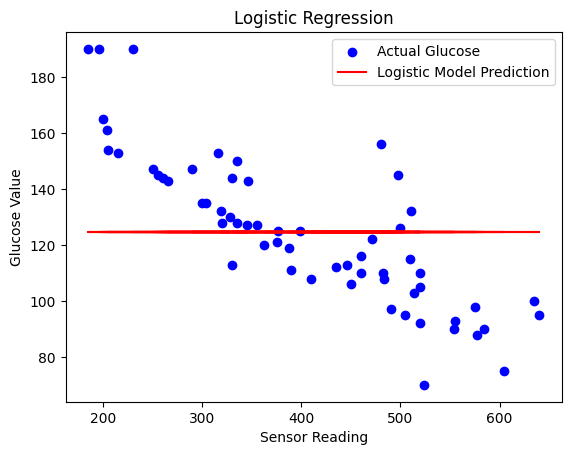

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Sample data

data2 = {
    'sensor_reading': [335, 230,300,320,330,480,265,520,375,185,490,205,215,355,250,328, 255,471,500,511,304,260,316,376,196,497,200,204,346,319,345,399,460,510,520,410,575,330,390,450,505,290,604,460,335,520, 635, 640, 514, 584, 388, 554, 482, 555, 435, 524, 483, 446, 362, 577],
    'actual_glucose': [150,190,135,128,144,156,143,92,121,190,97,154,153,127,147,130, 145,122,126,132,135,144,153,125,190,145,165,161,143,132,127, 125, 116, 115,110,108,98,113,111,106,95,147,75,110,128,105, 100, 95, 103, 90, 119, 90, 110, 93, 112, 70, 108, 113, 120, 88]

}
df = pd.DataFrame(data2)

# Logistic function model
def logistic_model(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Curve fitting to find optimal L, k, x0 values
popt, _ = curve_fit(logistic_model, df['sensor_reading'], df['actual_glucose'], maxfev=10000)

# Using fitted parameters to make predictions
L, k, x0 = popt
predicted_glucose = logistic_model(df['sensor_reading'], L, k, x0)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(df['actual_glucose'], predicted_glucose))
mae = mean_absolute_error(df['actual_glucose'], predicted_glucose)

# Print results
print("Optimized parameters: L =", L, ", k =", k, ", x0 =", x0)
print("RMSE:", rmse)
print("MAE:", mae)

# Plotting the data
plt.scatter(df['sensor_reading'], df['actual_glucose'], color='blue', label='Actual Glucose')
plt.plot(df['sensor_reading'], predicted_glucose, color='red', label='Logistic Model Prediction')
plt.xlabel('Sensor Reading')
plt.title("Logistic Regression")
plt.ylabel('Glucose Value')
plt.legend()
plt.show()


SVR

Support Vector Regression - Root Mean Squared Error (RMSE): 13.49731908876727
Support Vector Regression - Mean Absolute Error (MAE): 8.550027768040364


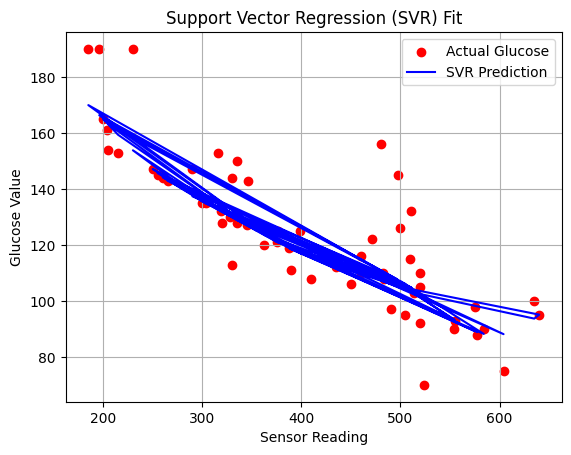

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Sample data
data2 = {
    'sensor_reading': [335, 230,300,320,330,480,265,520,375,185,490,205,215,355,250,328, 255,471,500,511,304,260,316,376,196,497,200,204,346,319,345,399,460,510,520,410,575,330,390,450,505,290,604,460,335,520, 635, 640, 514, 584, 388, 554, 482, 555, 435, 524, 483, 446, 362, 577],
    'actual_glucose': [150,190,135,128,144,156,143,92,121,190,97,154,153,127,147,130, 145,122,126,132,135,144,153,125,190,145,165,161,143,132,127, 125, 116, 115,110,108,98,113,111,106,95,147,75,110,128,105, 100, 95, 103, 90, 119, 90, 110, 93, 112, 70, 108, 113, 120, 88]

}
# Create a DataFrame
df = pd.DataFrame(data2)

# Reshape the sensor readings to be a 2D array (required by SVR)
X = df['sensor_reading'].values.reshape(-1, 1)
y = df['actual_glucose'].values

# Instantiate and fit the SVR model
svr = SVR(kernel='rbf', C=100, epsilon=0.1)  # Using RBF kernel
svr.fit(X, y)

# Predict the glucose values using the trained model
predicted_glucose_svr = svr.predict(X)

# Calculate RMSE and MAE for the SVR model
rmse_svr = np.sqrt(mean_squared_error(y, predicted_glucose_svr))
mae_svr = mean_absolute_error(y, predicted_glucose_svr)

print("Support Vector Regression - Root Mean Squared Error (RMSE):", rmse_svr)
print("Support Vector Regression - Mean Absolute Error (MAE):", mae_svr)

# Plot the results
plt.scatter(X, y, color='red', label='Actual Glucose')
plt.plot(X, predicted_glucose_svr, color='blue', label='SVR Prediction')
plt.xlabel("Sensor Reading")
plt.ylabel("Glucose Value")
plt.title("Support Vector Regression (SVR) Fit")
plt.legend()
plt.grid(True)
plt.show()


Random forest

Random Forest Regression - Root Mean Squared Error (RMSE): 6.599488498794252
Random Forest Regression - Mean Absolute Error (MAE): 4.798291865079366


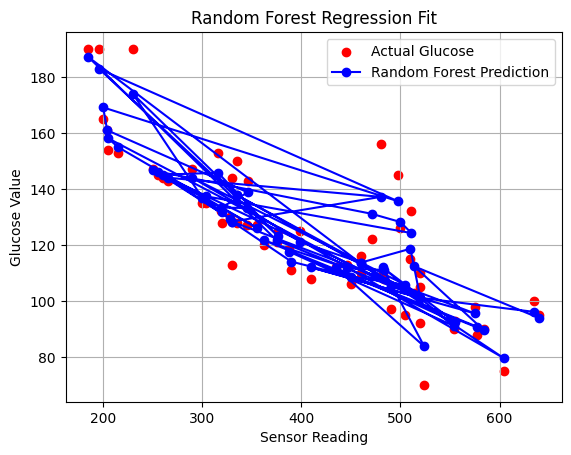

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Sample data
data2 = {
    'sensor_reading': [335, 230,300,320,330,480,265,520,375,185,490,205,215,355,250,328, 255,471,500,511,304,260,316,376,196,497,200,204,346,319,345,399,460,510,520,410,575,330,390,450,505,290,604,460,335,520, 635, 640, 514, 584, 388, 554, 482, 555, 435, 524, 483, 446, 362, 577],
    'actual_glucose': [150,190,135,128,144,156,143,92,121,190,97,154,153,127,147,130, 145,122,126,132,135,144,153,125,190,145,165,161,143,132,127, 125, 116, 115,110,108,98,113,111,106,95,147,75,110,128,105, 100, 95, 103, 90, 119, 90, 110, 93, 112, 70, 108, 113, 120, 88]

}

# Create a DataFrame
df = pd.DataFrame(data2)

# Features (X) and Target (y)
X = df['sensor_reading'].values.reshape(-1, 1)
y = df['actual_glucose'].values

# Instantiate and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predict the glucose values using the trained model
predicted_glucose_rf = rf_model.predict(X)
for i in range(len(predicted_glucose_rf)):
  absolute_error = abs(predicted_glucose_rf[i] - df['actual_glucose'][i])
  percentage_error = (absolute_error / df['actual_glucose'][i]) * 100


# Calculate RMSE and MAE for the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y, predicted_glucose_rf))
mae_rf = mean_absolute_error(y, predicted_glucose_rf)

print("Random Forest Regression - Root Mean Squared Error (RMSE):", rmse_rf)
print("Random Forest Regression - Mean Absolute Error (MAE):", mae_rf)

# Plot the results
plt.scatter(X, y, color='red', label='Actual Glucose')
plt.plot(X, predicted_glucose_rf, color='blue', label='Random Forest Prediction', marker='o')
plt.xlabel("Sensor Reading")
plt.ylabel("Glucose Value")
plt.title("Random Forest Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.tree import export_text

# Export rules for the first tree in the Random Forest
tree_rules = export_text(rf_model.estimators_[0], feature_names=['sensor_reading'])
print(tree_rules)


|--- sensor_reading <= 350.50
|   |--- sensor_reading <= 200.00
|   |   |--- value: [190.00]
|   |--- sensor_reading >  200.00
|   |   |--- sensor_reading <= 232.50
|   |   |   |--- sensor_reading <= 209.50
|   |   |   |   |--- value: [161.00]
|   |   |   |--- sensor_reading >  209.50
|   |   |   |   |--- value: [153.00]
|   |   |--- sensor_reading >  232.50
|   |   |   |--- sensor_reading <= 295.00
|   |   |   |   |--- sensor_reading <= 277.50
|   |   |   |   |   |--- sensor_reading <= 252.50
|   |   |   |   |   |   |--- value: [147.00]
|   |   |   |   |   |--- sensor_reading >  252.50
|   |   |   |   |   |   |--- sensor_reading <= 257.50
|   |   |   |   |   |   |   |--- value: [145.00]
|   |   |   |   |   |   |--- sensor_reading >  257.50
|   |   |   |   |   |   |   |--- sensor_reading <= 262.50
|   |   |   |   |   |   |   |   |--- value: [144.00]
|   |   |   |   |   |   |   |--- sensor_reading >  262.50
|   |   |   |   |   |   |   |   |--- value: [143.00]
|   |   |   |   |--- sensor